In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("ORGANICS.csv",encoding="cp1251")

In [2]:
print(df.shape)
df.info()
df = df.fillna(df.median(axis=0), axis=0)

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   п»їID            22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [3]:
x=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

tree=DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=1)
tree.fit(x_train, y_train)
y_score = tree.predict(x_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))

0.704965450747228
0.4117647058823529
0.4128205128205128
0.41229193341869397
0.607577995782988
0.21533923570888058
0.21533892105554497


[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[0. 1. 1. ... 1. 0. 0.]


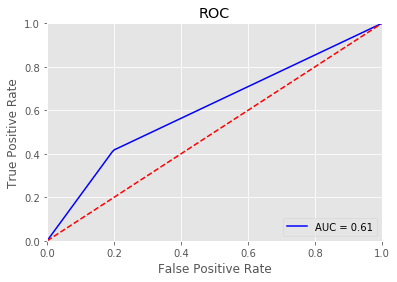

In [4]:
probs = tree.predict_proba(x_test)
print(probs)
preds = probs[:,1]
print(preds)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [5]:
tree_balanced = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=50, class_weight='balanced')
tree_balanced.fit(x_train, y_train)

y_score = tree_balanced.predict(x_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))

0.7440141410895067
0.6739130434782609
0.4932147870846982
0.5695757903269386
0.7207298636579971
0.40327785833255764
0.3935665155482848
